<a href="https://colab.research.google.com/github/slvrsrfrrr/Machine-Learning/blob/main/Hutch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hutch Gaming Data Analysis Task**

# Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
file_path = "testdata.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort data by Date for correct time series analysis
df = df.sort_values(by='Date')

# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Date             0
Total Revenue    0
UA Spend         0
Installs         0
dtype: int64


In [4]:
import pandas as pd

def remove_outliers_iqr(df, group_col='UA Spend', target_col='Total Revenue'):
    cleaned_df = pd.DataFrame()

    # Group by each UA Spend level
    for spend_level, group in df.groupby(group_col):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1

        # Filter out outliers in the target column
        filtered = group[
            (group[target_col] >= Q1 - 1.5 * IQR) &
            (group[target_col] <= Q3 + 1.5 * IQR)
        ]
        cleaned_df = pd.concat([cleaned_df, filtered], axis=0)

    return cleaned_df.reset_index(drop=True)

# Apply it to both Installs and Revenue
df_cleaned = remove_outliers_iqr(df, group_col='UA Spend', target_col='Installs')
df_cleaned = remove_outliers_iqr(df_cleaned, group_col='UA Spend', target_col='Total Revenue')


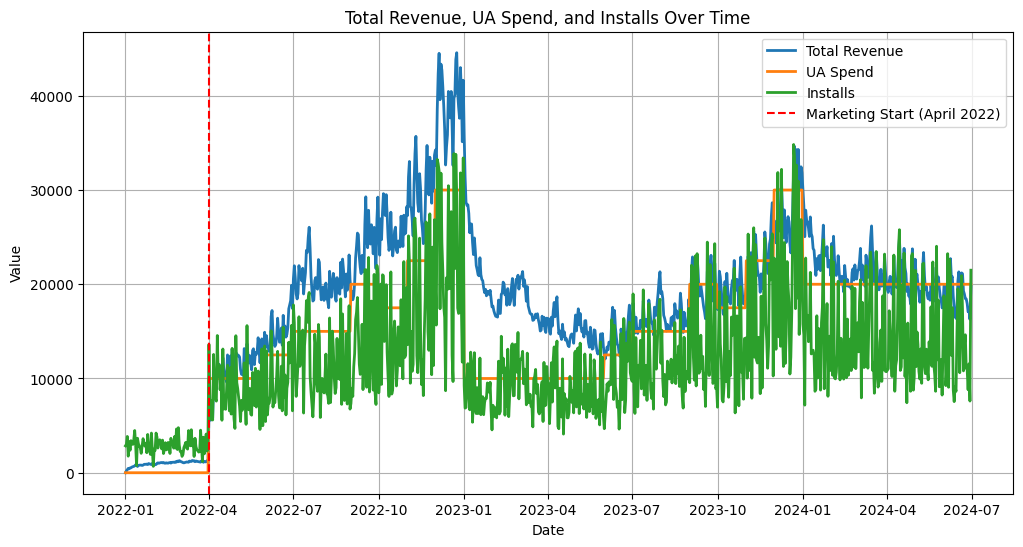

In [3]:
# Plot Total Revenue, UA Spend, and Installs over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Revenue'], label='Total Revenue', linewidth=2)
plt.plot(df['Date'], df['UA Spend'], label='UA Spend', linewidth=2)
plt.plot(df['Date'], df['Installs'], label='Installs', linewidth=2)

# Add vertical line for marketing start date
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Total Revenue, UA Spend, and Installs Over Time")
plt.grid()
plt.show()


In [4]:
df['Revenue_Smoothed'] = df['Total Revenue'].rolling(30, min_periods=1).mean()
df['Spend_Smoothed'] = df['UA Spend'].rolling(1, min_periods=1).mean()
df['Installs_Smoothed'] = df['Installs'].rolling(30, min_periods=1).mean()

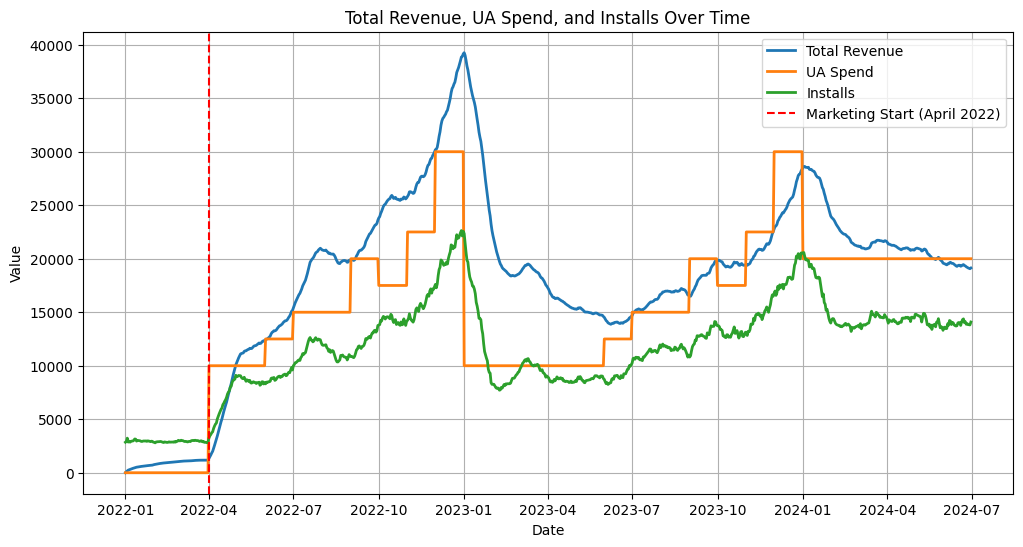

In [5]:
# Plot Total Revenue, UA Spend, and Installs over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue_Smoothed'], label='Total Revenue', linewidth=2)
plt.plot(df['Date'], df['Spend_Smoothed'], label='UA Spend', linewidth=2)
plt.plot(df['Date'], df['Installs_Smoothed'], label='Installs', linewidth=2)

# Add vertical line for marketing start date
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Total Revenue, UA Spend, and Installs Over Time")
plt.grid()
plt.show()


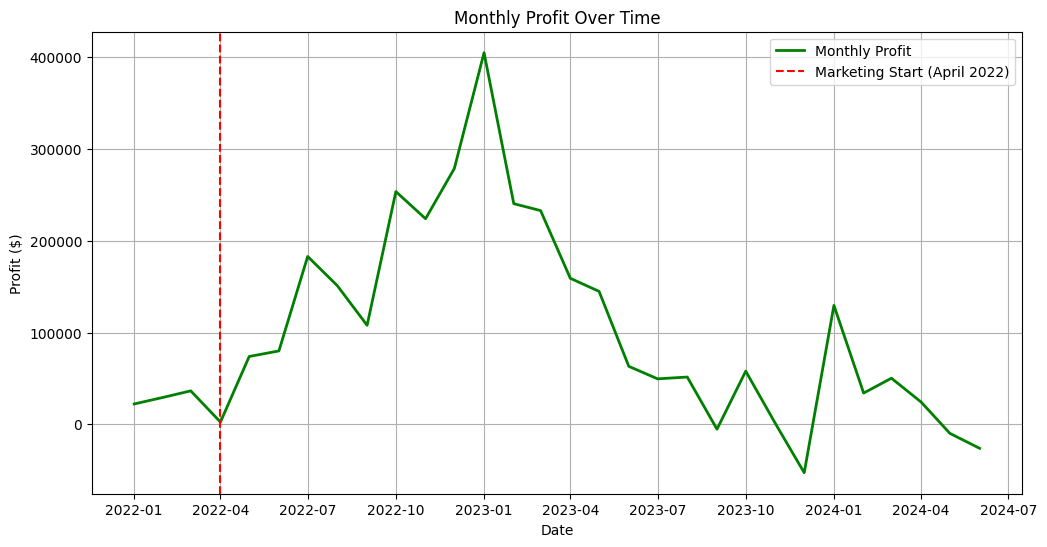

In [6]:
# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Create a new 'Month' column for aggregation
df['Month'] = df['Date'].dt.to_period("M")

# Compute Monthly Profit (Revenue - UA Spend)
monthly_profit = df.groupby('Month').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Total_UA_Spend=('UA Spend', 'sum')
).reset_index()

# Compute profit
monthly_profit['Profit'] = monthly_profit['Total_Revenue'] - monthly_profit['Total_UA_Spend']

# Convert Month to datetime for plotting
monthly_profit['Month'] = monthly_profit['Month'].astype(str)
monthly_profit['Month'] = pd.to_datetime(monthly_profit['Month'])

# Plot Monthly Profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['Month'], monthly_profit['Profit'], label='Monthly Profit', linewidth=2, color='green')

# Add vertical line for marketing start date
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")

# Labels & Styling
plt.legend()
plt.xlabel("Date")
plt.ylabel("Profit ($)")
plt.title("Monthly Profit Over Time")
plt.grid()
plt.show()


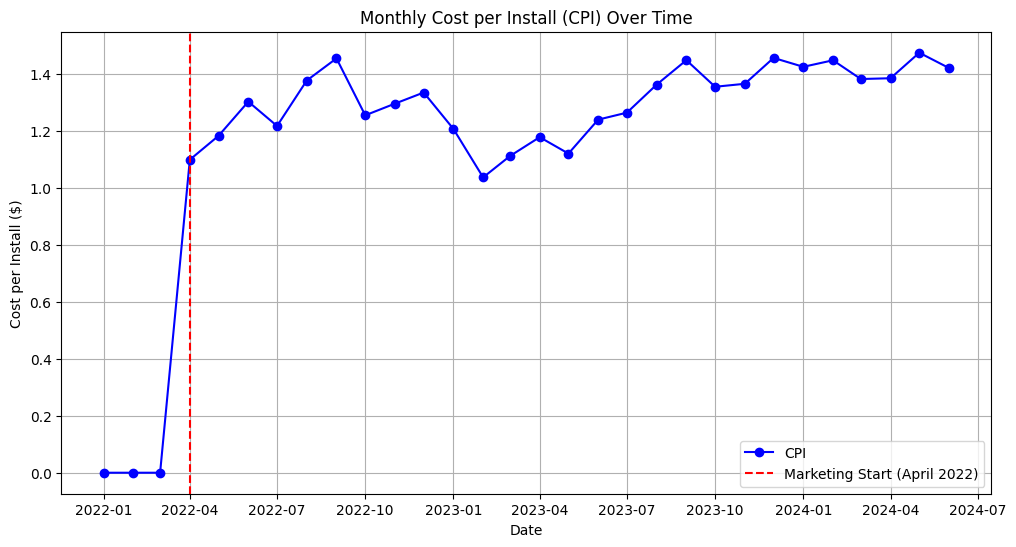

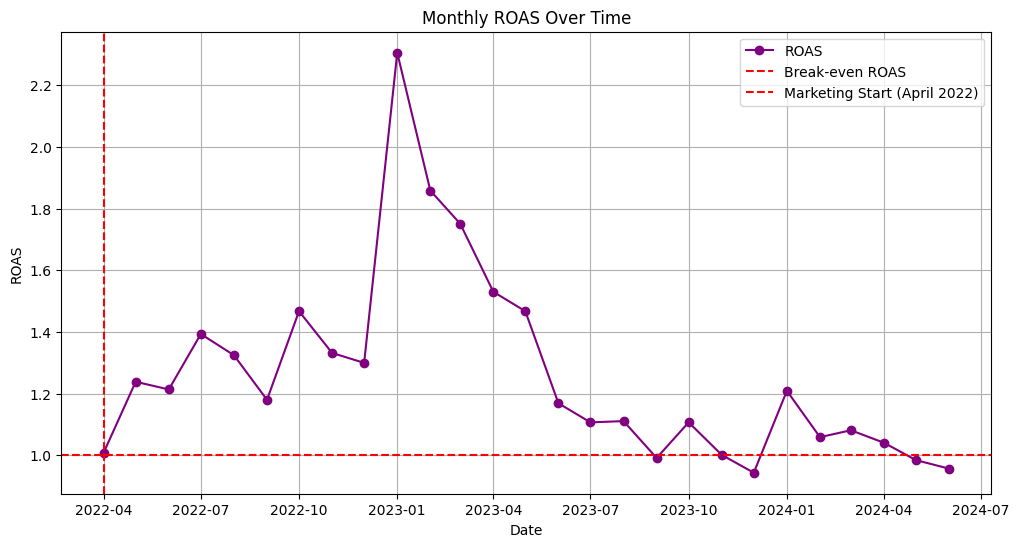

In [7]:
# Compute Monthly Metrics (CPI and ROAS)
monthly_metrics = df.groupby('Month').agg(
    Total_Revenue=('Total Revenue', 'sum'),
    Total_UA_Spend=('UA Spend', 'sum'),
    Total_Installs=('Installs', 'sum')
).reset_index()

# Compute Cost per Install (CPI) and ROAS
monthly_metrics['CPI'] = monthly_metrics['Total_UA_Spend'] / monthly_metrics['Total_Installs']
monthly_metrics['ROAS'] = monthly_metrics['Total_Revenue'] / monthly_metrics['Total_UA_Spend']

# Convert Month to datetime for plotting
monthly_metrics['Month'] = monthly_metrics['Month'].astype(str)
monthly_metrics['Month'] = pd.to_datetime(monthly_metrics['Month'])

# Plot Monthly Cost per Install (CPI)
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['Month'], monthly_metrics['CPI'], marker='o', linestyle='-', label='CPI', color='blue')
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")

# Labels & Styling for CPI Graph
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cost per Install ($)")
plt.title("Monthly Cost per Install (CPI) Over Time")
plt.grid()
plt.show()

# Plot Monthly ROAS
plt.figure(figsize=(12, 6))
plt.plot(monthly_metrics['Month'], monthly_metrics['ROAS'], marker='o', linestyle='-', label='ROAS', color='purple')
plt.axhline(1.0, color='red', linestyle="--", label="Break-even ROAS")
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")

# Labels & Styling for ROAS Graph
plt.legend()
plt.xlabel("Date")
plt.ylabel("ROAS")
plt.title("Monthly ROAS Over Time")
plt.grid()
plt.show()

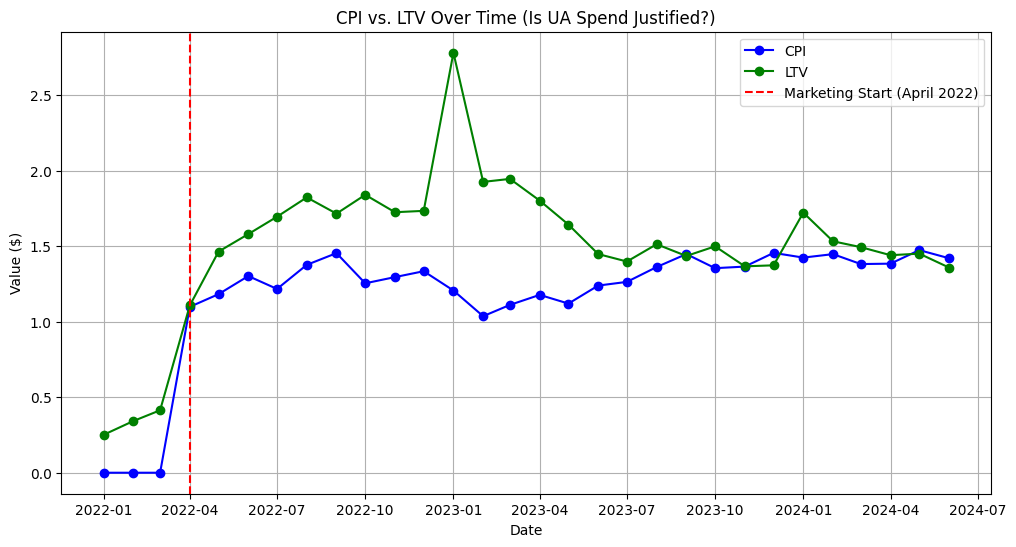

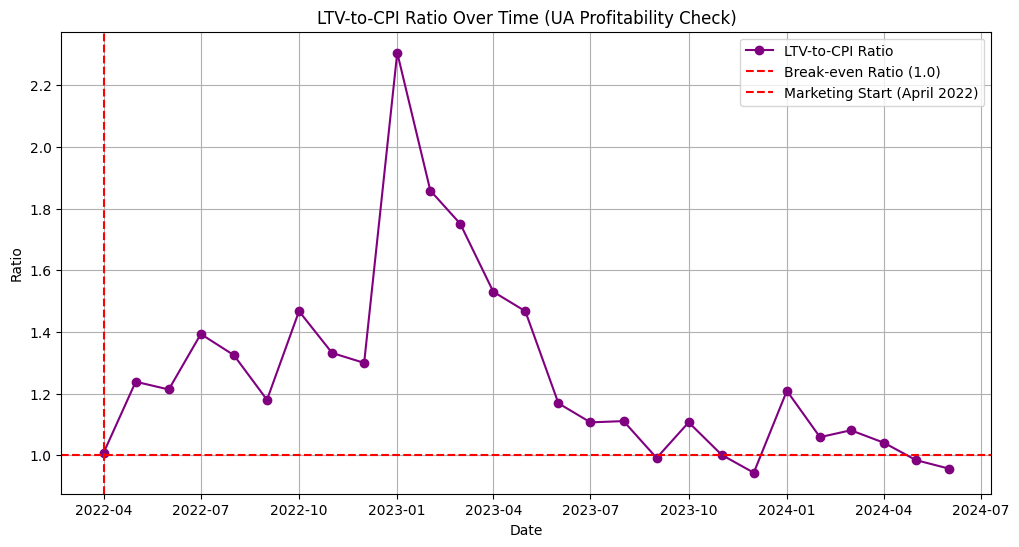

In [8]:
monthly_metrics['LTV'] = monthly_metrics['Total_Revenue'] / monthly_metrics['Total_Installs']

# Compute LTV-to-CPI Ratio
monthly_metrics['LTV_CPI_Ratio'] = monthly_metrics['LTV'] / monthly_metrics['CPI']

# Compute Break-even CPI (Assuming Target ROAS = 1.5 for profitability)
target_roas = 1.5
monthly_metrics['Break_even_CPI'] = monthly_metrics['LTV'] / target_roas

# Compute Profit Per Install
monthly_metrics['Profit_per_Install'] = monthly_metrics['LTV'] - monthly_metrics['CPI']

# Plot CPI vs. LTV Over Time
plt.figure(figsize=(12,6))
plt.plot(monthly_metrics['Month'], monthly_metrics['CPI'], marker='o', linestyle='-', label='CPI', color='blue')
plt.plot(monthly_metrics['Month'], monthly_metrics['LTV'], marker='o', linestyle='-', label='LTV', color='green')
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.title("CPI vs. LTV Over Time (Is UA Spend Justified?)")
plt.grid()
plt.show()

# Plot LTV-to-CPI Ratio Over Time
plt.figure(figsize=(12,6))
plt.plot(monthly_metrics['Month'], monthly_metrics['LTV_CPI_Ratio'], marker='o', linestyle='-', label='LTV-to-CPI Ratio', color='purple')
plt.axhline(1, color='red', linestyle="--", label="Break-even Ratio (1.0)")
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.title("LTV-to-CPI Ratio Over Time (UA Profitability Check)")
plt.grid()
plt.show()

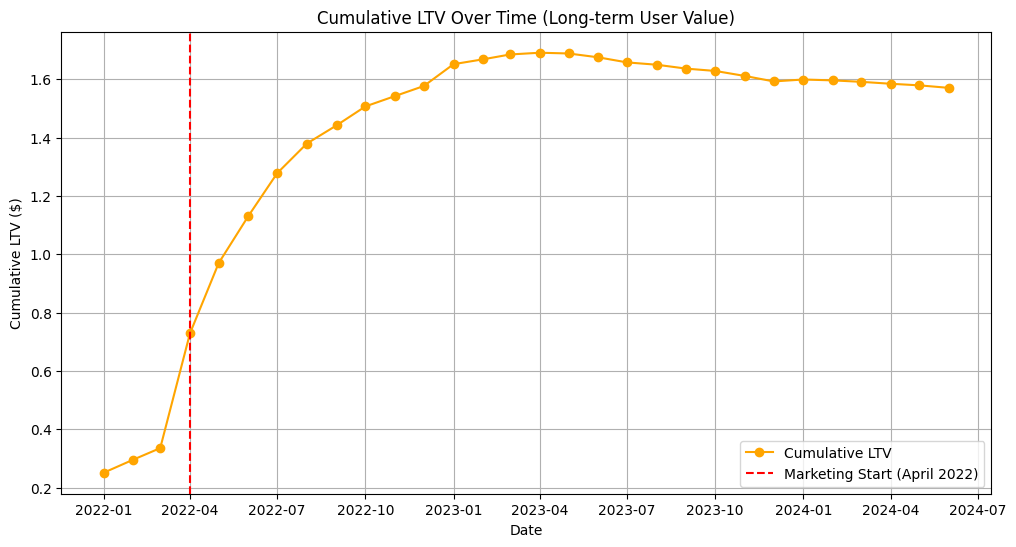

In [9]:
# Compute Cumulative LTV Over Time
monthly_metrics['Cumulative_Revenue'] = monthly_metrics['Total_Revenue'].cumsum()
monthly_metrics['Cumulative_Installs'] = monthly_metrics['Total_Installs'].cumsum()
monthly_metrics['LTV_Cumulative'] = monthly_metrics['Cumulative_Revenue'] / monthly_metrics['Cumulative_Installs']

# Plot Cumulative LTV
plt.figure(figsize=(12,6))
plt.plot(monthly_metrics['Month'], monthly_metrics['LTV_Cumulative'], marker='o', linestyle='-', label='Cumulative LTV', color='orange')
plt.axvline(pd.to_datetime("2022-04-01"), color='red', linestyle="--", label="Marketing Start (April 2022)")

# Labels & Styling
plt.legend()
plt.xlabel("Date")
plt.ylabel("Cumulative LTV ($)")
plt.title("Cumulative LTV Over Time (Long-term User Value)")
plt.grid()
plt.show()


Users spend a lot initially, but spending slows after a few months. Okay, but retention strategies needed.
Users aren’t spending much after install, or high churn is reducing overall value. Bad! UA spend may not be justified.


In [10]:
import statsmodels.api as sm

df_spend = df[df['Date'] >= "2022-04-01"].copy()

# Ensure no zero values to avoid log errors
df_spend['log_revenue'] = np.log(df_spend['Total Revenue'].replace(0, np.nan))
df_spend['log_spend'] = np.log(df_spend['UA Spend'].replace(0, np.nan))

# Run log-log regression
X_log = sm.add_constant(df_spend['log_spend'])
model_log = sm.OLS(df_spend['log_revenue'], X_log).fit()

# Print regression summary
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     922.8
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.16e-136
Time:                        14:44:10   Log-Likelihood:                 146.20
No. Observations:                 822   AIC:                            -288.4
Df Residuals:                     820   BIC:                            -279.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7646      0.201     18.689      0.0

In [11]:
df['Revenue_Smoothed'] = df['Total Revenue'].rolling(7, min_periods=1).mean()
df['Spend_Smoothed'] = df['UA Spend'].rolling(7, min_periods=1).mean()
df['Installs_Smoothed'] = df['Installs'].rolling(7, min_periods=1).mean()

In [12]:
import statsmodels.api as sm

# Define time periods
df_early = df[df['Date'] < "2022-04-01"]  # Pre-UA Spend
df_growth = df[(df['Date'] >= "2022-04-01") & (df['Date'] < "2023-01-01")]  # Growth Phase
df_maturity = df[(df['Date'] >= "2023-01-01") & (df['Date'] < "2024-01-01")]  # Maturity Phase
df_saturation = df[df['Date'] >= "2024-01-01"]  # Saturation Phase

# Function to run regression and return coefficient
def run_regression(df_segment, label):
    if len(df_segment) > 10:  # Ensure enough data points
        X = sm.add_constant(df_segment['Spend_Smoothed'])
        y = df_segment['Revenue_Smoothed']
        model = sm.OLS(y, X).fit()
        print(f"🔹 {label} (Spend Coefficient): {model.params[1]:.4f}, R² = {model.rsquared:.3f}")
        return model.summary()
    else:
        print(f"⚠️ Not enough data for {label}")
        return None

# Run regressions for each phase
summary_early = run_regression(df_early, "Early Phase (Pre-UA)")
summary_growth = run_regression(df_growth, "Growth Phase")
summary_maturity = run_regression(df_maturity, "Maturity Phase")
summary_saturation = run_regression(df_saturation, "Saturation Phase")


🔹 Early Phase (Pre-UA) (Spend Coefficient): 0.0000, R² = -0.000
🔹 Growth Phase (Spend Coefficient): 1.3825, R² = 0.950
🔹 Maturity Phase (Spend Coefficient): 0.5137, R² = 0.462
🔹 Saturation Phase (Spend Coefficient): 1.5027, R² = 0.415


<ipython-input-12-d3964af5d091>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"🔹 {label} (Spend Coefficient): {model.params[1]:.4f}, R² = {model.rsquared:.3f}")
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
<ipython-input-12-d3964af5d091>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"🔹 {label} (Spend Coefficient): {model.params[1]:.4f}, R² = {model.rsquared:.3f}")
<ipython-input-12-d3964af5d091>:15: FutureWarning: Series.__getitem__ treating keys as positio

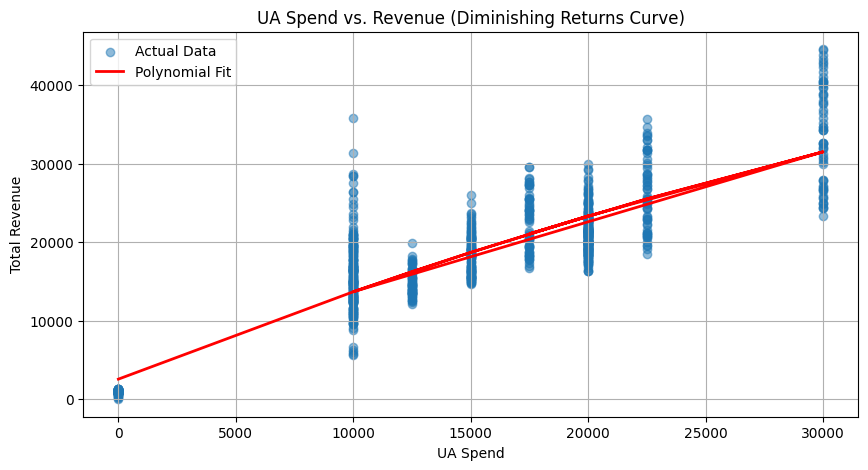

In [13]:
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

# Fit a polynomial regression (degree 2)
p = Polynomial.fit(df['UA Spend'], df['Total Revenue'], 2)

# Plot the curve
plt.figure(figsize=(10,5))
plt.scatter(df['UA Spend'], df['Total Revenue'], alpha=0.5, label="Actual Data")
plt.plot(df['UA Spend'], p(df['UA Spend']), color='red', label="Polynomial Fit", linewidth=2)
plt.xlabel("UA Spend")
plt.ylabel("Total Revenue")
plt.title("UA Spend vs. Revenue (Diminishing Returns Curve)")
plt.legend()
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     922.8
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.16e-136
Time:                        14:44:11   Log-Likelihood:                 146.20
No. Observations:                 822   AIC:                            -288.4
Df Residuals:                     820   BIC:                            -279.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7646      0.201     18.689      0.0

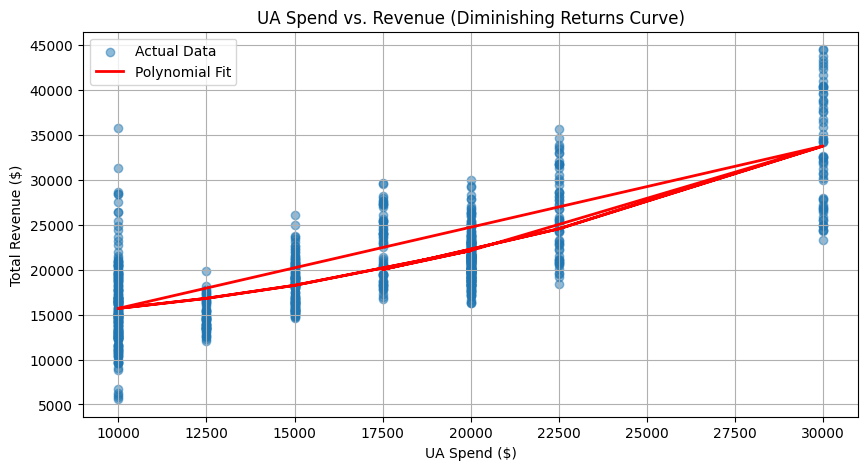

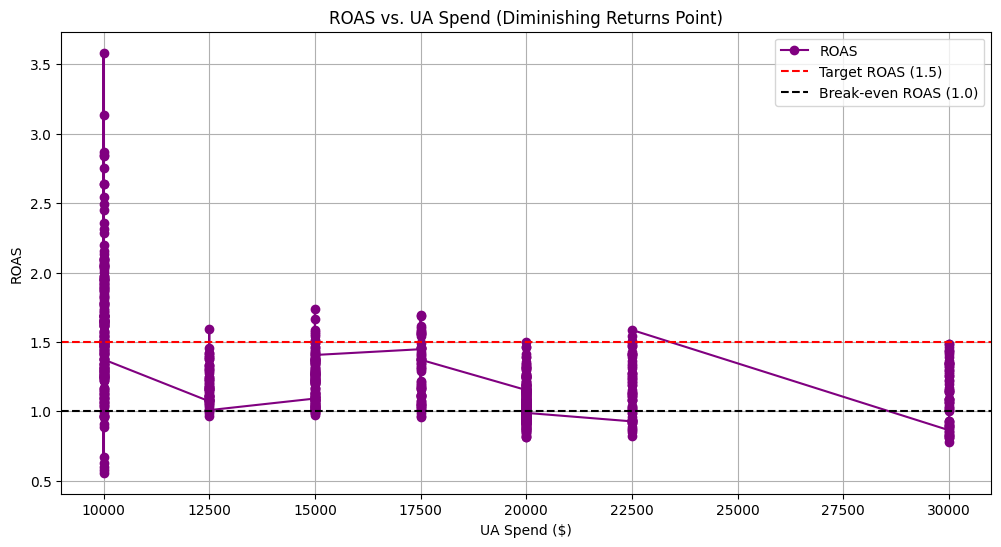

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
df['ROAS'] = df['Total Revenue'] / df['UA Spend'].replace(0, np.nan)
# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data to only include periods after April 2022 (start of UA spend)
df_ua = df[df['Date'] >= "2022-04-01"].copy()

# Ensure no zero values to avoid log errors
df_ua['log_revenue'] = np.log(df_ua['Total Revenue'].replace(0, np.nan))
df_ua['log_spend'] = np.log(df_ua['UA Spend'].replace(0, np.nan))

# 📌 Step 1: Run Log-Log Regression to Confirm Diminishing Returns
X_log = sm.add_constant(df_ua['log_spend'])
model_log = sm.OLS(df_ua['log_revenue'], X_log).fit()

print(model_log.summary())

# 📌 Step 2: Fit a Polynomial Regression (Degree 2) to Find the Inflection Point
p = Polynomial.fit(df_ua['UA Spend'], df_ua['Total Revenue'], 2)

# Plot the polynomial regression curve
plt.figure(figsize=(10,5))
plt.scatter(df_ua['UA Spend'], df_ua['Total Revenue'], alpha=0.5, label="Actual Data")
plt.plot(df_ua['UA Spend'], p(df_ua['UA Spend']), color='red', label="Polynomial Fit", linewidth=2)
plt.xlabel("UA Spend ($)")
plt.ylabel("Total Revenue ($)")
plt.title("UA Spend vs. Revenue (Diminishing Returns Curve)")
plt.legend()
plt.grid()
plt.show()

# 📌 Step 3: ROAS vs. UA Spend (Finding the Efficiency Threshold)
# Sort data by spend to smooth the ROAS curve
df_ua_sorted = df_ua.sort_values(by='UA Spend')

plt.figure(figsize=(12,6))
plt.plot(df_ua_sorted['UA Spend'], df_ua_sorted['ROAS'], marker='o', linestyle='-', label='ROAS', color='purple')
plt.axhline(1.5, color='red', linestyle="--", label="Target ROAS (1.5)")
plt.axhline(1.0, color='black', linestyle="--", label="Break-even ROAS (1.0)")

# Labels & Styling
plt.legend()
plt.xlabel("UA Spend ($)")
plt.ylabel("ROAS")
plt.title("ROAS vs. UA Spend (Diminishing Returns Point)")
plt.grid()
plt.show()


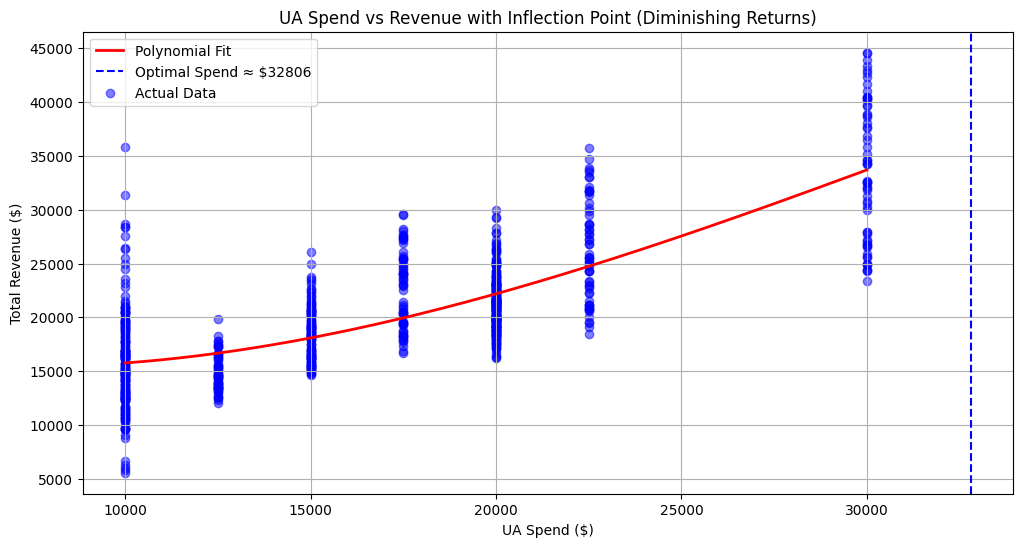

np.float64(32806.171929239266)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Extract UA Spend and Total Revenue
X = df_ua['UA Spend'].values
y = df_ua['Total Revenue'].values

# Fit a Polynomial Regression (degree 3 to capture diminishing returns)
degree = 3  # Adjust degree if necessary
coeffs = np.polyfit(X, y, degree)
poly = np.poly1d(coeffs)

# Compute First and Second Derivative
first_derivative = np.polyder(poly, 1)  # First derivative
second_derivative = np.polyder(poly, 2)  # Second derivative

# Find the spend value where the second derivative is zero (inflection point)
critical_spend = np.roots(second_derivative)

# Only keep real and positive solutions (valid spend values)
critical_spend = [s for s in critical_spend if np.isreal(s) and s > 0]
optimal_spend = np.real(critical_spend[0]) if len(critical_spend) > 0 else None

# Plot Revenue and Derivatives
spend_range = np.linspace(min(X), max(X), 1000)
plt.figure(figsize=(12,6))

# Plot Total Revenue curve
plt.plot(spend_range, poly(spend_range), label="Polynomial Fit", color='red', linewidth=2)

# Mark the inflection point
if optimal_spend:
    plt.axvline(optimal_spend, color='blue', linestyle="--", label=f"Optimal Spend ≈ ${optimal_spend:.0f}")

# Labels and Legend
plt.scatter(X, y, color='blue', alpha=0.5, label="Actual Data")
plt.xlabel("UA Spend ($)")
plt.ylabel("Total Revenue ($)")
plt.title("UA Spend vs Revenue with Inflection Point (Diminishing Returns)")
plt.legend()
plt.grid()
plt.show()

# Output the optimal spend where diminishing returns begin
optimal_spend


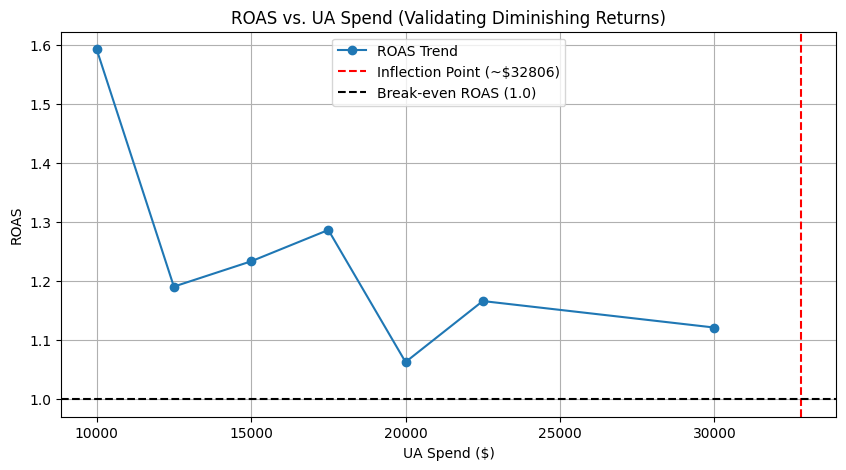

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate ROAS (Return on Ad Spend) for each spend level
df_ua['ROAS'] = df_ua['Total Revenue'] / df_ua['UA Spend']

# Group by spend level and calculate mean ROAS per spend level
roas_trend = df_ua.groupby('UA Spend')['ROAS'].mean().reset_index()

# Plot ROAS trend over different spend levels
plt.figure(figsize=(10,5))
plt.plot(roas_trend['UA Spend'], roas_trend['ROAS'], marker='o', linestyle='-', label="ROAS Trend")

# Mark the inflection point
if 'optimal_spend' in locals():
    plt.axvline(optimal_spend, color='red', linestyle="--", label=f"Inflection Point (~${optimal_spend:.0f})")

# Horizontal line for break-even ROAS (1.0)
plt.axhline(1.0, color='black', linestyle="--", label="Break-even ROAS (1.0)")

# Labels and legend
plt.xlabel("UA Spend ($)")
plt.ylabel("ROAS")
plt.title("ROAS vs. UA Spend (Validating Diminishing Returns)")
plt.legend()
plt.grid()
plt.show()


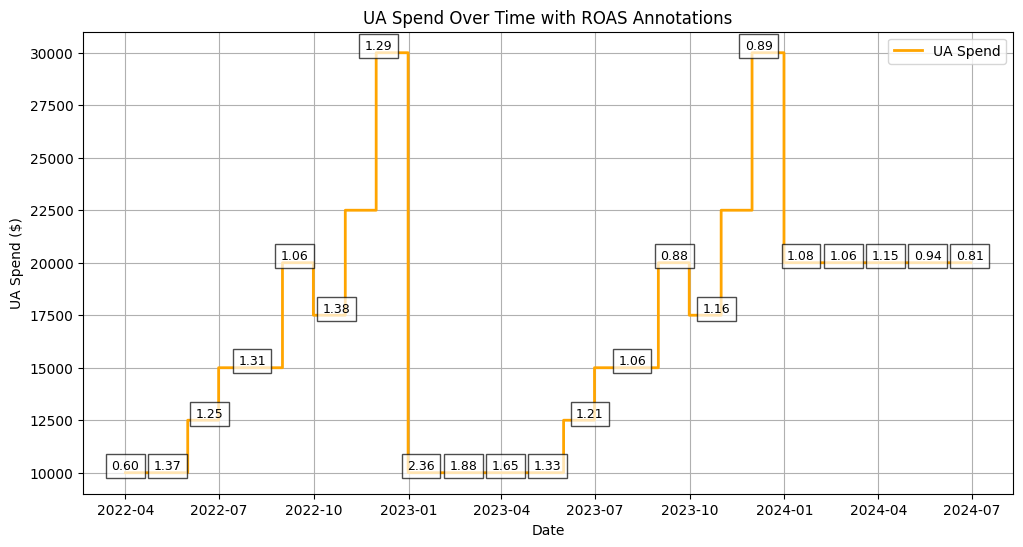

In [17]:
import matplotlib.pyplot as plt

# Filter dataset after April 2022 (UA Spend started)
df_ua = df[df['Date'] >= "2022-04-01"].copy()

# Calculate ROAS (Return on Ad Spend)
df_ua['ROAS'] = df_ua['Total Revenue'] / df_ua['UA Spend']

# Plot UA Spend over time
plt.figure(figsize=(12,6))
plt.step(df_ua['Date'], df_ua['UA Spend'], where='mid', label='UA Spend', color='orange', linewidth=2)

# Annotate each spend level with its ROAS value
for i in range(0, len(df_ua), max(1, len(df_ua)//20)):  # Reduce number of annotations for clarity
    date = df_ua['Date'].iloc[i]
    spend = df_ua['UA Spend'].iloc[i]
    roas = df_ua['ROAS'].iloc[i]
    plt.text(date, spend, f"{roas:.2f}", fontsize=9, ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.7))

# Labels and Titles
plt.xlabel("Date")
plt.ylabel("UA Spend ($)")
plt.title("UA Spend Over Time with ROAS Annotations")
plt.legend()
plt.grid()
plt.show()


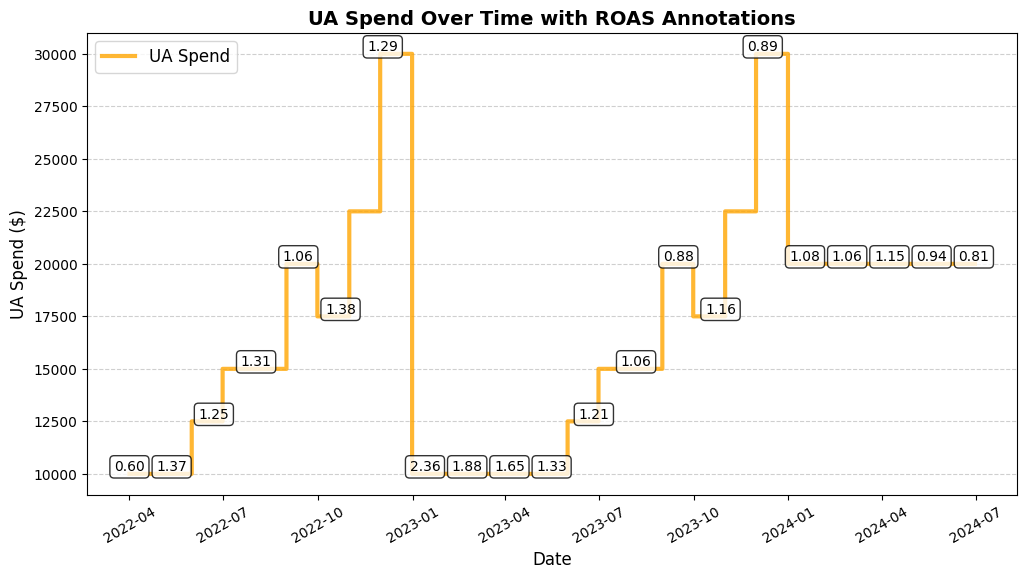

In [18]:
import matplotlib.pyplot as plt

# Re-plot UA Spend over time with improved readability
plt.figure(figsize=(12,6))
plt.step(df_ua['Date'], df_ua['UA Spend'], where='mid', label='UA Spend', color='orange', linewidth=3, alpha=0.8)

# Annotate each spend level with its ROAS value, improving text clarity
for i in range(0, len(df_ua), max(1, len(df_ua)//20)):
    date = df_ua['Date'].iloc[i]
    spend = df_ua['UA Spend'].iloc[i]
    roas = df_ua['ROAS'].iloc[i]
    plt.text(date, spend, f"{roas:.2f}", fontsize=10, ha='center', va='bottom',
             color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle="round,pad=0.3", alpha=0.8))

# Improve overall aesthetics
plt.xlabel("Date", fontsize=12)
plt.ylabel("UA Spend ($)", fontsize=12)
plt.title("UA Spend Over Time with ROAS Annotations", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.xticks(fontsize=10, rotation=30)  # Improve date readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.6)

# Show the plot
plt.show()


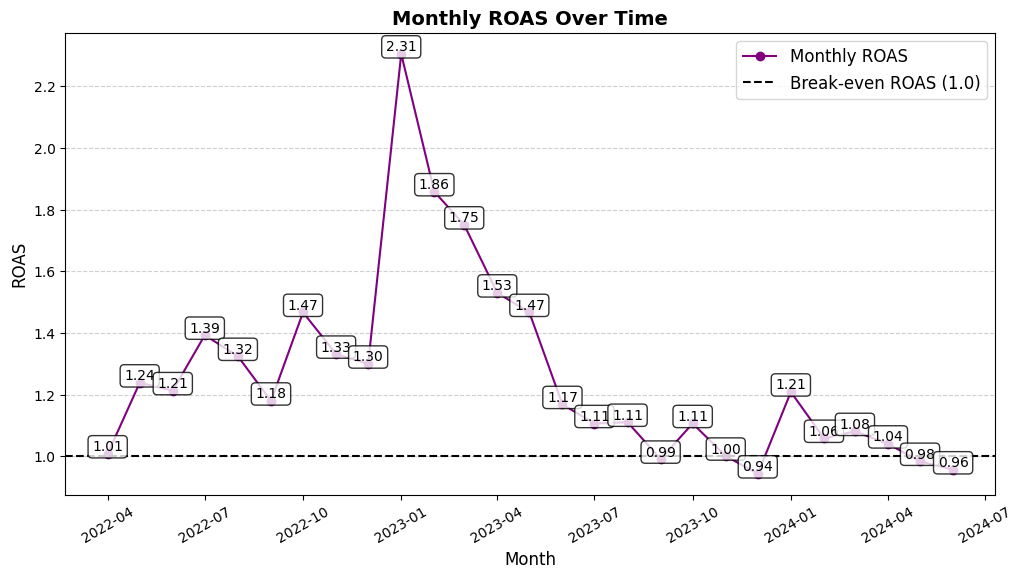

In [19]:
import matplotlib.pyplot as plt

# Filter dataset after April 2022 (UA Spend started)
df_ua = df[df['Date'] >= "2022-04-01"].copy()

# Aggregate monthly UA Spend and Total Revenue
df_ua['YearMonth'] = df_ua['Date'].dt.to_period('M')  # Extract year-month for grouping

# Group by month and sum UA Spend and Revenue for each month
monthly_metrics = df_ua.groupby('YearMonth')[['UA Spend', 'Total Revenue']].sum().reset_index()

# Calculate Monthly ROAS (Revenue / Spend)
monthly_metrics['ROAS'] = monthly_metrics['Total Revenue'] / monthly_metrics['UA Spend']

# Convert YearMonth back to datetime for plotting
monthly_metrics['YearMonth'] = monthly_metrics['YearMonth'].dt.to_timestamp()

# Plot Monthly ROAS
plt.figure(figsize=(12,6))
plt.plot(monthly_metrics['YearMonth'], monthly_metrics['ROAS'], marker='o', linestyle='-', color='purple', label="Monthly ROAS")

# Mark the break-even ROAS line (1.0)
plt.axhline(1.0, color='black', linestyle="--", label="Break-even ROAS (1.0)")

# Annotate each month's ROAS value
for i in range(len(monthly_metrics)):
    date = monthly_metrics['YearMonth'].iloc[i]
    roas = monthly_metrics['ROAS'].iloc[i]
    plt.text(date, roas, f"{roas:.2f}", fontsize=10, ha='center', va='bottom',
             color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle="round,pad=0.3", alpha=0.8))

# Labels and Titles
plt.xlabel("Month", fontsize=12)
plt.ylabel("ROAS", fontsize=12)
plt.title("Monthly ROAS Over Time", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=10, rotation=30)  # Improve date readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.6)

# Show the plot
plt.show()


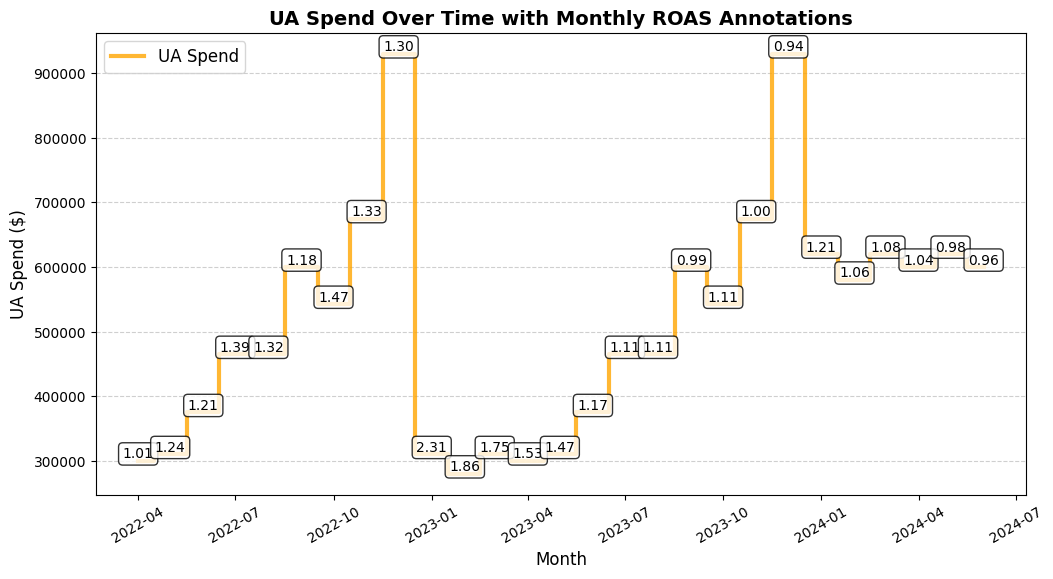

In [20]:
import matplotlib.pyplot as plt

# Plot UA Spend over time with Monthly ROAS Annotations
plt.figure(figsize=(12,6))
plt.step(monthly_metrics['YearMonth'], monthly_metrics['UA Spend'], where='mid',
         label='UA Spend', color='orange', linewidth=3, alpha=0.8)

# Annotate each monthly spend level with its ROAS value
for i in range(len(monthly_metrics)):
    date = monthly_metrics['YearMonth'].iloc[i]
    spend = monthly_metrics['UA Spend'].iloc[i]
    roas = monthly_metrics['ROAS'].iloc[i]
    plt.text(date, spend, f"{roas:.2f}", fontsize=10, ha='center', va='bottom',
             color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle="round,pad=0.3", alpha=0.8))

# Improve aesthetics
plt.xlabel("Month", fontsize=12)
plt.ylabel("UA Spend ($)", fontsize=12)
plt.title("UA Spend Over Time with Monthly ROAS Annotations", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.xticks(fontsize=10, rotation=30)  # Improve date readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.6)

# Show the plot
plt.show()



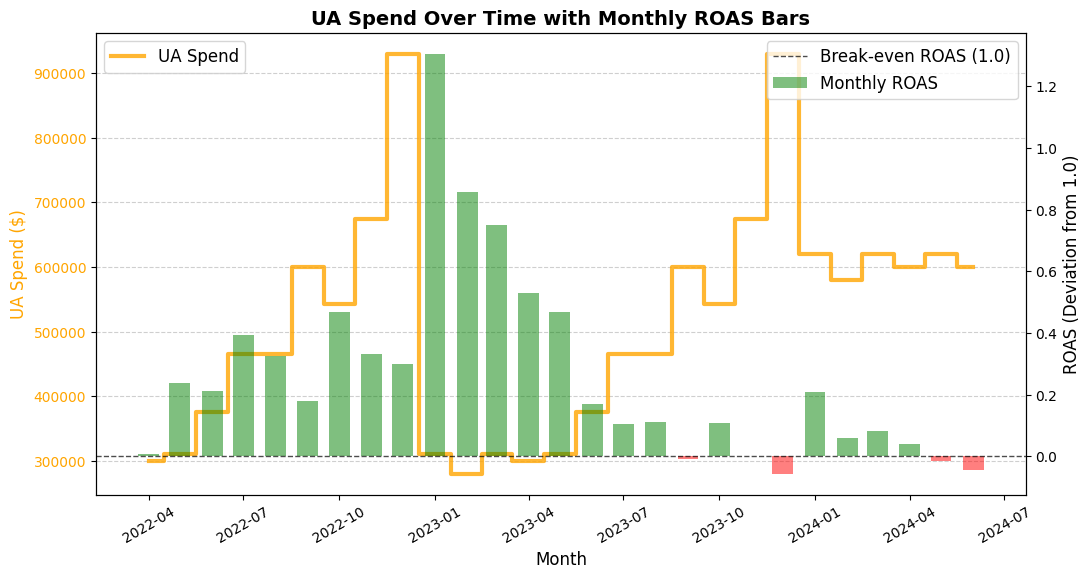

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define positive and negative ROAS values for bar colors
bar_colors = ['green' if roas >= 1 else 'red' for roas in monthly_metrics['ROAS']]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot the step graph for UA Spend
ax1.step(monthly_metrics['YearMonth'], monthly_metrics['UA Spend'], where='mid',
         label='UA Spend', color='orange', linewidth=3, alpha=0.8)

# Create a secondary y-axis for ROAS bar chart
ax2 = ax1.twinx()

# Plot the ROAS bar chart with zero-centered bars
ax2.bar(monthly_metrics['YearMonth'], monthly_metrics['ROAS'] - 1, width=20, color=bar_colors, alpha=0.5, label="Monthly ROAS")

# Add a horizontal line at ROAS = 1 (breakeven)
ax2.axhline(0, color='black', linestyle="--", linewidth=1, alpha=0.7, label="Break-even ROAS (1.0)")

# Labels and Titles
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("UA Spend ($)", fontsize=12, color='orange')
ax2.set_ylabel("ROAS (Deviation from 1.0)", fontsize=12, color='black')
ax1.set_title("UA Spend Over Time with Monthly ROAS Bars", fontsize=14, fontweight='bold')

# Adjust tick formatting
ax1.tick_params(axis='x', labelrotation=30, labelsize=10)
ax1.tick_params(axis='y', labelcolor='orange', labelsize=10)
ax2.tick_params(axis='y', labelcolor='black', labelsize=10)

# Add grids for readability
ax1.grid(axis='y', linestyle="--", alpha=0.6)

# Show legends
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [22]:
df.head()

,Date,Total Revenue,UA Spend,Installs,Revenue_Smoothed,Spend_Smoothed,Installs_Smoothed,Month,ROAS
0,2022-01-01,0.000000,0,2850.291615,0.000000,0.0,2850.291615,2022-01,NaN
1,2022-01-02,192.128337,0,2991.506700,96.064168,0.0,2920.899158,2022-01,NaN
2,2022-01-03,313.914116,0,3850.701093,168.680818,0.0,3230.833136,2022-01,NaN
3,2022-01-04,456.877058,0,1756.069992,240.729878,0.0,2862.142350,2022-01,NaN
4,2022-01-05,415.302561,0,3296.474472,275.644414,0.0,2949.008774,2022-01,NaN


In [7]:
from google.colab import files

# Save the DataFrame as a CSV file
df_cleaned.to_csv('exported_data.csv', index=False)

# Download the file
files.download('exported_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>